In [4]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [5]:
sig, sr = librosa.load('kaggle-data/train/7e0d06929.flac')
spectrum = librosa.feature.melspectrogram(
    y=sig, sr=sr, fmin=150, n_fft=512, 
    hop_length=130, n_mels=80, norm=100.0, power=0.6)

In [6]:
spectrum.shape

(80, 10177)

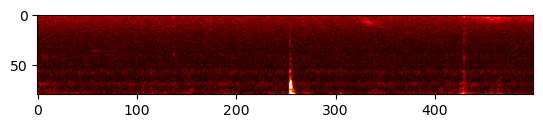

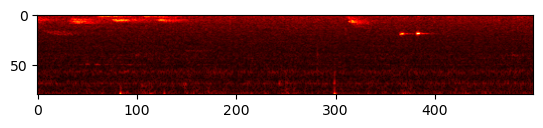

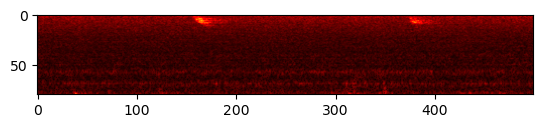

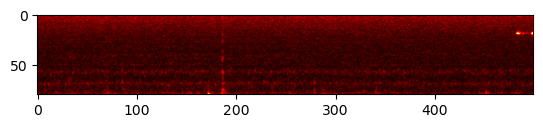

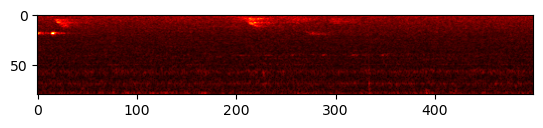

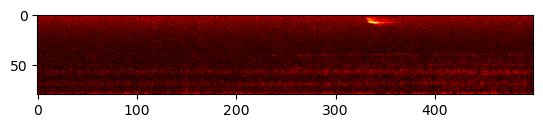

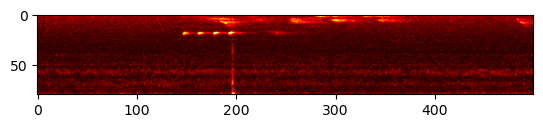

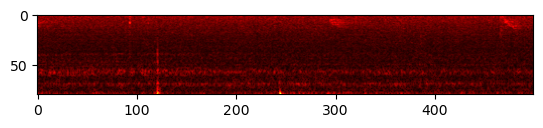

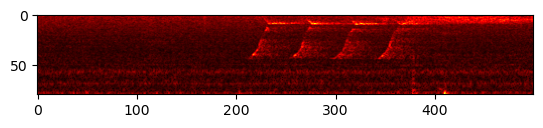

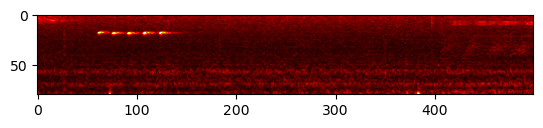

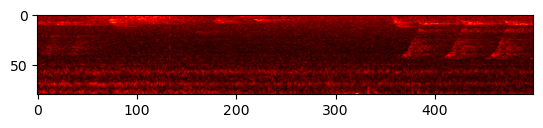

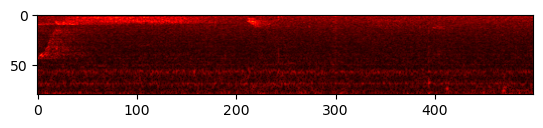

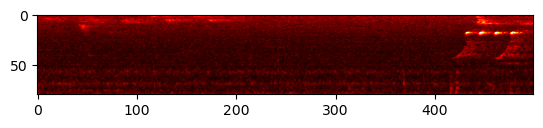

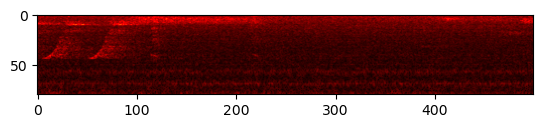

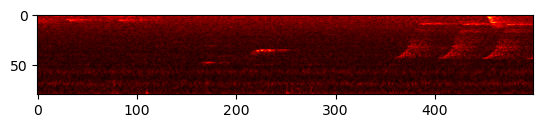

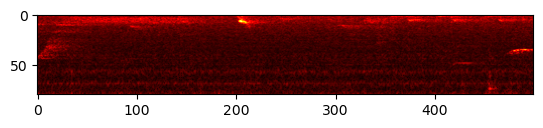

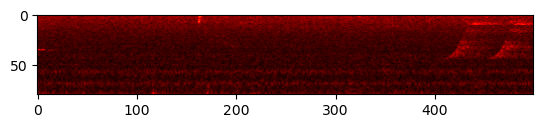

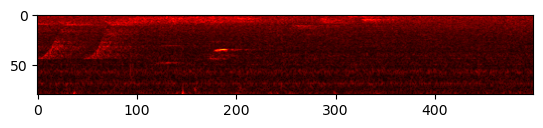

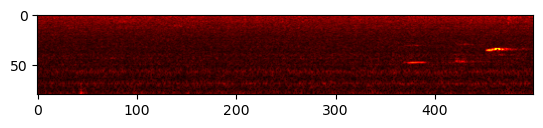

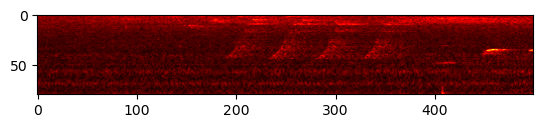

In [7]:
for i in range(20):
    plt.imshow(spectrum[::-1,i*500:(i+1)*500], cmap='hot', vmin=0, vmax=4)
    plt.show()

In [13]:
import pandas as pd

tfp = pd.read_csv('kaggle-data/train_fp.csv')
ttp = pd.read_csv('kaggle-data/train_tp.csv')

In [26]:
ttp[ttp.recording_id=='7e0d06929']

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
626,7e0d06929,10,1,37.5409,947.461,39.9848,10852.7


In [36]:
sum(ttp.t_max - ttp.t_min) / 60.0

51.41893666666667

In [35]:
sum(tfp.t_max - tfp.t_min) / 60.0

342.3745566666649

`train_fp.csv` contains 342 minutes of bird songs and `train_tp.csv` contains 51 minutes of bird songs. But there is probably more in the recordings which is not labeled?

In [71]:
songtypes = [np.unique(ttp[ttp.species_id == i].songtype_id.values) for i in range(24)]
dict(zip(range(24), songtypes))

{0: array([1]),
 1: array([1]),
 2: array([1]),
 3: array([1]),
 4: array([1]),
 5: array([1]),
 6: array([1]),
 7: array([1]),
 8: array([1]),
 9: array([1]),
 10: array([1]),
 11: array([1]),
 12: array([1]),
 13: array([1]),
 14: array([1]),
 15: array([1]),
 16: array([4]),
 17: array([1, 4]),
 18: array([1]),
 19: array([1]),
 20: array([1]),
 21: array([1]),
 22: array([1]),
 23: array([1, 4])}

In [67]:
species = [(i, sum(ttp[ttp.species_id == i].t_max - ttp[ttp.species_id == i].t_min), len(ttp[ttp.species_id == i])) for i in range(24)]
sorted(species, key = lambda x: x[1], reverse = True)

[(23, 700.371600000001, 100),
 (17, 336.7139000000001, 68),
 (8, 206.1331000000001, 50),
 (20, 170.60270000000003, 40),
 (15, 167.19999999999982, 50),
 (7, 157.06680000000006, 50),
 (12, 156.79999999999987, 50),
 (10, 122.19489999999998, 50),
 (5, 118.35730000000007, 50),
 (9, 112.80050000000006, 34),
 (6, 106.09620000000007, 50),
 (4, 96.76789999999994, 50),
 (16, 91.73349999999994, 50),
 (22, 70.63499999999999, 44),
 (19, 66.73599999999999, 43),
 (2, 65.71199999999999, 37),
 (11, 56.88899999999998, 50),
 (21, 54.66760000000002, 50),
 (1, 44.800000000000026, 50),
 (0, 44.69329999999999, 50),
 (3, 37.06639999999998, 50),
 (18, 34.666300000000035, 50),
 (13, 34.44799999999996, 50),
 (14, 31.98420000000002, 50)]